**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [106]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [107]:
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import KDTree

In [108]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(X)

    def predict(self, X):
        if self.algorithm == 'kd_tree':
            ind = self.tree.query(X, self.n_neighbors)[1]
        else:
            ind = np.argpartition(pairwise_distances(X, self.X_train),
                                  self.n_neighbors)[:, :self.n_neighbors]
        nearest_class = self.y_train[ind].astype(int)
        return np.array(list(map(lambda x: np.argmax(np.bincount(x)),
                                 nearest_class)))

    def predict_proba(self, X):
        if self.algorithm == 'kd_tree':
            ind = self.tree.query(X, k=self.n_neighbors)[1]
        else:
            ind = np.argpartition(pairwise_distances(X, self.X_train),
                                  self.n_neighbors)[:, :self.n_neighbors]
        nearest_class = self.y_train[ind].astype(int)
        s = len(set(self.y_train))
        return np.array(list(map(lambda x: np.bincount(x, minlength=s),
                                 nearest_class))) / self.n_neighbors

    def score(self, X, y):
        return (1 - len(np.nonzero(y-self.predict(X))[0]) / len(y))

**IRIS**

In [133]:
iris = datasets.load_iris()

In [134]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [135]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [136]:
%time clf.fit(X_train, y_train)

Wall time: 4 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [137]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [138]:
%time for i in range(1000): clf.predict(X_test)

Wall time: 1.16 s


In [139]:
%time for i in range(1000): my_clf.predict(X_test)

Wall time: 735 ms


In [140]:
%time clf.predict_proba(X_test)

Wall time: 4 ms


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [141]:
%time my_clf.predict_proba(X_test)

Wall time: 3.99 ms


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [142]:
clf.score(X_test, y_test)

0.9333333333333333

In [143]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

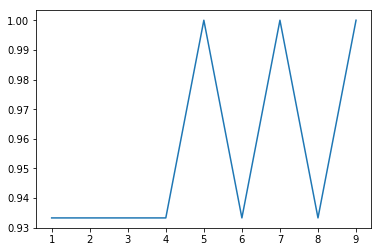

In [144]:
#%%pycodestyle
score_list = []
for i in range(1, 10):
    my_clf = MyKNeighborsClassifier(n_neighbors=i)
    my_clf.fit(X_train, y_train)
    score_list.append(my_clf.score(X_test, y_test))
plt.plot(range(1, 10), score_list)

**MNIST**

In [145]:
mnist = fetch_mldata('MNIST original')

In [146]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [147]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [148]:
%time clf.fit(X_train, y_train)

Wall time: 15.6 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [149]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [150]:
%time clf.predict(X_test[:15])

Wall time: 1.22 s


array([5., 1., 5., 8., 2., 6., 6., 1., 7., 2., 3., 7., 4., 1., 4.])

In [151]:
%time my_clf.predict(X_test[:15])

Wall time: 1.26 s


array([5, 1, 5, 8, 2, 6, 6, 1, 7, 2, 3, 7, 4, 1, 4], dtype=int64)

In [152]:
%time clf.predict_proba(X_test)

Wall time: 11.3 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [153]:
%time my_clf.predict_proba(X_test)

Wall time: 12.9 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [154]:
clf.score(X_test, y_test)

0.9614285714285714

In [155]:
my_clf.score(X_test, y_test)

0.9614285714285714

Задание 4

In [156]:
clf = KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=7, algorithm='kd_tree')

In [157]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [158]:
%time clf.fit(X_train, y_train)

Wall time: 2min 18s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [159]:
%time my_clf.fit(X_train, y_train)

Wall time: 2min 25s


In [160]:
%time clf.predict(X_test)

Wall time: 3min 3s


array([4., 9., 1., 4., 6., 7., 2., 6., 1., 9., 3., 1., 1., 8., 5., 0., 6.,
       3., 0., 0., 1., 6., 2., 0., 7., 5., 2., 1., 5., 3., 7., 9., 3., 5.,
       2., 8., 2., 3., 2., 9., 8., 2., 1., 3., 1., 7., 1., 0., 7., 9., 1.,
       9., 3., 6., 7., 8., 3., 7., 5., 2., 7., 8., 1., 1., 3., 5., 2., 3.,
       8., 7., 2., 8., 5., 8., 2., 3., 8., 3., 4., 9., 6., 6., 0., 6., 3.,
       0., 9., 6., 0., 5., 5., 1., 7., 5., 3., 7., 6., 2., 8., 8., 6., 6.,
       3., 0., 6., 2., 3., 8., 0., 9., 1., 7., 8., 7., 2., 8., 0., 6., 4.,
       3., 2., 8., 9., 1., 3., 4., 9., 5., 7., 2., 2., 2., 8., 4., 5., 9.,
       3., 0., 4., 2., 0., 3., 1., 3., 8., 4., 5., 8., 7., 6., 9., 7., 7.,
       1., 4., 1., 2., 6., 5., 0., 1., 6., 8., 3., 4., 5., 7., 7., 5., 0.,
       7., 5., 5., 0., 3., 1., 6., 7., 4., 5., 3., 4., 9., 3., 7., 6., 2.,
       8., 3., 2., 1., 5., 1., 4., 9., 6., 7., 5., 0., 1., 1., 1., 8., 3.,
       1., 7., 1., 0., 8., 1., 8., 3., 0., 3., 0., 8., 4., 2., 4., 0., 4.,
       5., 2., 0., 0., 6.

In [161]:
%time my_clf.predict(X_test)

Wall time: 2min 23s


array([4, 9, 1, 4, 6, 7, 2, 6, 1, 9, 3, 1, 1, 8, 5, 0, 6, 3, 0, 0, 1, 6,
       2, 0, 7, 5, 2, 1, 5, 3, 7, 9, 3, 5, 2, 8, 2, 3, 2, 9, 8, 2, 1, 3,
       1, 7, 1, 0, 7, 9, 1, 9, 3, 6, 7, 8, 3, 7, 5, 2, 7, 8, 1, 1, 3, 5,
       2, 3, 8, 7, 2, 8, 5, 8, 2, 3, 8, 3, 4, 9, 6, 6, 0, 6, 3, 0, 9, 6,
       0, 5, 5, 1, 7, 5, 3, 7, 6, 2, 8, 8, 6, 6, 3, 0, 6, 2, 3, 8, 0, 9,
       1, 7, 8, 7, 2, 8, 0, 6, 4, 3, 2, 8, 9, 1, 3, 4, 9, 5, 7, 2, 2, 2,
       8, 4, 5, 9, 3, 0, 4, 2, 0, 3, 1, 3, 8, 4, 5, 8, 7, 6, 9, 7, 7, 1,
       4, 1, 2, 6, 5, 0, 1, 6, 8, 3, 4, 5, 7, 7, 5, 0, 7, 5, 5, 0, 3, 1,
       6, 7, 4, 5, 3, 4, 9, 3, 7, 6, 2, 8, 3, 2, 1, 5, 1, 4, 9, 6, 7, 5,
       0, 1, 1, 1, 8, 3, 1, 7, 1, 0, 8, 1, 8, 3, 0, 3, 0, 8, 4, 2, 4, 0,
       4, 5, 2, 0, 0, 6, 9, 4, 7, 7, 8, 4, 1, 9, 0, 9, 0, 0, 6, 5, 1, 6,
       3, 5, 1, 1, 4, 2, 3, 3, 8, 9, 1, 5, 0, 9, 9, 8, 1, 4, 0, 0, 2, 5,
       4, 4, 3, 7, 8, 5, 9, 8, 9, 7, 0, 9, 7, 9, 2, 4, 9, 2, 0, 1, 8, 6,
       6, 7, 8, 2, 7, 8, 5, 2, 1, 0, 6, 7, 2, 4, 1,

In [162]:
%time clf.predict_proba(X_test)

Wall time: 2min 49s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [163]:
%time my_clf.predict_proba(X_test)

Wall time: 2min 16s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [164]:
clf.score(X_test, y_test)

0.9785714285714285

In [165]:
my_clf.score(X_test, y_test)

0.9785714285714285

Задание 5

In [ ]:
# seaborn
# используется для визуального анализа данных
# matplotlib
# используется для визуального анализа данных
# train_test_split
# используется для разделения выборки на обучающую и тестовую
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# позволяет выполнить последовательные действия
# StandardScaler (from sklearn.preprocessing import StandardScaler)
# используется для стандартизации данных (после которой каждый признак имеет среднее 0 и дисперсию 1)
# ClassifierMixin
# используется для подсчета точности
# NeighborsBase
# базовый классификатор для KNN
# KNeighborsMixin
# используется для поиска соседей 
# SupervisedIntegerMixin
# описывает метод fit для различных моделей